In [1]:
import numpy as np
from matplotlib import patches
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from wholeslidedata.annotation.parser import MaskAnnotationParser
from wholeslidedata.image.wholeslideimage import WholeSlideImage
from wholeslidedata.iterators import create_batch_iterator
from wholeslidedata.image.wholeslideimage import WholeSlideImage

In [3]:
# open one image from validation set
image = WholeSlideImage('C:/Users/mbotros/PhD/data/ASL/ASL24_1_HE.tif', backend='asap')

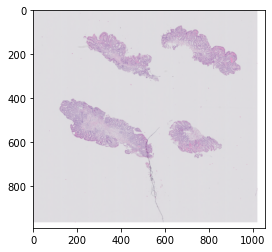

In [4]:
plot_spacing = 8.0
downsampling = image.get_downsampling_from_spacing(plot_spacing)

slide = image.get_slide(plot_spacing)
plt.imshow(slide)
plt.show()

In [ ]:
mode='test'

with create_batch_iterator(mode=mode,
                           user_config='./slidingwindowconfig.yml',
                           presets=('folders',),
                           cpus=1, 
                           number_of_batches=-1, 
                           return_info=True) as test_iterator:

    print('number of annotations', len(test_iterator))

    for x_batch, y_batch, info in tqdm(test_iterator):
        for idx, (x_sample, y_sample) in enumerate(zip(x_batch, y_batch)):
            point = info['sample_references'][idx]['point']
            print('idx', idx, 'x_shape', x_sample.shape, 'mask_shape', y_sample.shape,  point)